# Régression linéaire

Ce notebook s'intéresse à la façon d'interpréter les résultats d'une régression linéaire lorsque les variables sont corrélées puis il explore une façon d'associer arbre de décision et régression linéaire pour construire une régression linéaire par morceaux.

In [11]:
%matplotlib inline

## Un cas simple

Une façon d'interpréter des résultats statistiques est de les calculer dans un cas où la réponse cherchée est connue. On simule un modèle simple $Y=\alpha X_1 + 0.X_2 + \epsilon$ et on cale une régression linéaire. On suppose que $X_1, X_2, \epsilon$ sont des variables aléatoires gaussiennes de même variance et moyenne.

In [12]:
import numpy.random as npr

eps = npr.normal(1000)
X = npr.normal(size=(1000, 3))
alpha = 2
Y = alpha * X[:, 0] + X[:, 2]
X.shape, Y.shape

((1000, 3), (1000,))

In [13]:
from numpy import corrcoef

corrcoef(X.T)

array([[ 1.        ,  0.02585011, -0.00808406],
       [ 0.02585011,  1.        ,  0.00338766],
       [-0.00808406,  0.00338766,  1.        ]])

In [14]:
from statsmodels.regression.linear_model import OLS

In [15]:
model = OLS(Y, X[:, :2])
results = model.fit()
su = results.summary()
su

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.803
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              2029.
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                        0.00
Time:                        11:29:03   Log-Likelihood:                         -1417.8
No. Observations:                1000   AIC:                                      2840.
Df Residuals:                     998   BIC:                                      2849.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9922      0.031     63.680      0.000       1.931       2.054
x2             0.0041      0.032      0.130      0.896      -0.058       0.067
==============================================================================
Omnibus:                        4.685   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                4.706
Skew:                          -0.167   Prob(JB):                       0.0951
Kurtosis:                       2.972   Cond. No.                         1.03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
results.rsquared, results.rsquared_adj

(np.float64(0.8026213180783517), np.float64(0.8022257696175868))

On vérifie que le coefficient devant $X_1$ est non nul (P-value nulle, 0 n'est pas l'intervalle de confiance). Le coefficient devant $X_2$ n'est pas nul mais presque, la P-value est élevée, le coefficient $R^2$ est élevé. Dessinons.

/tmp/ipykernel_21413/1827909711.py:6: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  seaborn.kdeplot(x=X[:, 0], y=Y, cmap="Reds", shade=True, shade_lowest=False, ax=ax[1])
/tmp/ipykernel_21413/1827909711.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  seaborn.kdeplot(x=X[:, 0], y=Y, cmap="Reds", shade=True, shade_lowest=False, ax=ax[1])


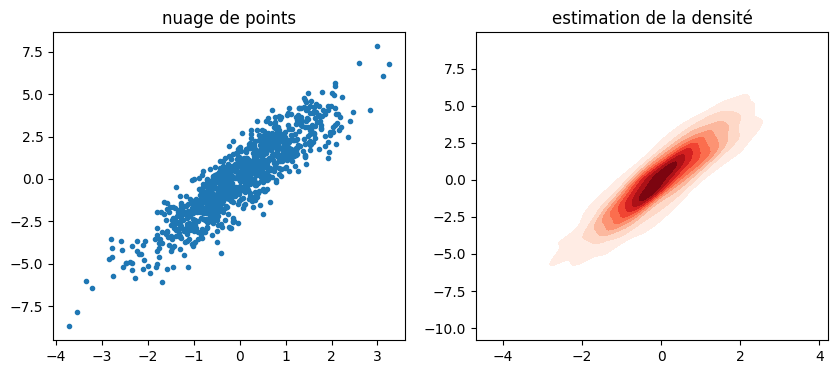

In [17]:
import matplotlib.pyplot as plt
import seaborn

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(X[:, 0], Y, ".")
seaborn.kdeplot(x=X[:, 0], y=Y, cmap="Reds", shade=True, shade_lowest=False, ax=ax[1])
ax[0].set_title("nuage de points")
ax[1].set_title("estimation de la densité");

## Evolution de R2

Dans la régression précédente, le coefficient $R^2$ transcrit en quelque sorte la part du bruit $\epsilon$ par rapport au terme $\alpha X_1$. Faisons varier $\alpha$.

In [18]:
alphas = []
r2s = []
for a in [0.1 * i for i in range(50)]:
    Y = a * X[:, 0] + X[:, 2]
    model = OLS(Y, X[:, :2])
    results = model.fit()
    alphas.append(a)
    r2s.append(results.rsquared)

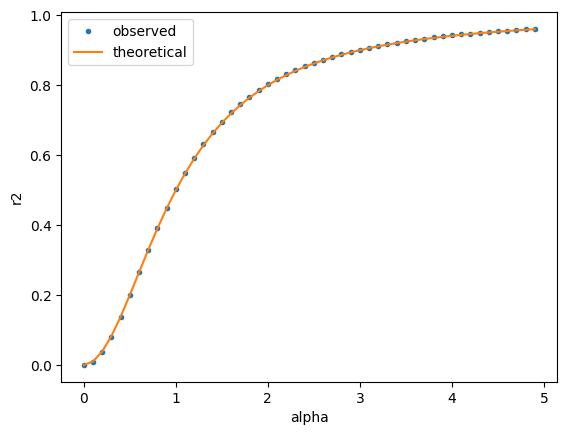

In [19]:
fig, ax = plt.subplots(1, 1)
ax.plot(alphas, r2s, ".", label="observed")
ax.plot(alphas, [a**2 / (1 + a**2) for a in alphas], label="theoretical")
ax.set_xlabel("alpha")
ax.set_ylabel("r2")
ax.legend();

Dans ce cas de régression simple, la valeur à prédire est $y_i$, la valeur prédite est $\hat{y_i}=\alpha X_{1i}$ et la moyenne $\bar{y} = \alpha \bar{X_1} + \bar{\epsilon} = 0$.

$$R^2 = 1 - \frac{\sum_{i=1}^n (\hat{y_i}-\bar{y})^2}{\sum_{i=1}^n (y_i - \bar{y})^2}=1-\frac{\mathbb{V}\epsilon}{\alpha^2\mathbb{V}X_1+\mathbb{V}\epsilon} = 1 - \frac{1}{1+\alpha^2}=\frac{\alpha^2}{1+\alpha^2}$$

## Deux variables corrélées

On ne change pas le modèle mais on fait en sorte que $X_2=X_1$. Les deux variables sont corrélées.

In [20]:
X[:, 1] = X[:, 0]
Y = 2 * X[:, 0] + X[:, 2]
model = OLS(Y, X[:, :2])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.803
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              4062.
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                        0.00
Time:                        11:29:04   Log-Likelihood:                         -1417.8
No. Observations:                1000   AIC:                                      2838.
Df Residuals:                     999   BIC:                                      2843.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9961      0.016     63.736      0.000       0.965       1.027
x2             0.9961      0.016     63.736      0.000       0.965       1.027
==============================================================================
Omnibus:                        4.681   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                4.705
Skew:                          -0.167   Prob(JB):                       0.0951
Kurtosis:                       2.971   Cond. No.                     3.15e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.06e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
model.rank

np.int64(1)

Les variables corrélées n'ont pas l'air de déranger l'algorithme de résolution car il utilise la méthode [SVD](https://en.wikipedia.org/wiki/Singular-value_decomposition) pour résoudre le même problème dans un espace de moindre dimension. Le problème survient que les deux variables ne sont pas complétement corrélées. On étudie le modèle $Y \sim X_1 + X'_2$ avec $X'_2 = \alpha X_1 + (1-\alpha) X_2$ et on réduit la variance du bruit pour en diminuer les effets.

In [22]:
X_ = npr.normal(size=(1000, 3))

In [23]:
alphas = [0.9 + i * 0.01 for i in range(11)]
res = []
for a in alphas:
    X = X_.copy()
    X[:, 1] = a * X[:, 0] + (1 - a) * X[:, 1]
    Y = X[:, 0] + X[:, 1] + 0.1 * X[:, 2]
    model = OLS(Y, X[:, :2])
    results = model.fit()
    res.append(
        dict(
            alpha=a,
            r2=results.rsquared,
            rank=model.rank,
            c1=results.params[0],
            c2=results.params[1],
        )
    )

import pandas

df = pandas.DataFrame(res)
df = df.set_index("alpha")
df

,r2,rank,c1,c2
alpha,,,,
0.90,0.997328,2,1.013974,0.986445
0.91,0.997353,2,1.015480,0.984939
0.92,0.997379,2,1.017363,0.983056
0.93,0.997403,2,1.019783,0.980636
0.94,0.997428,2,1.023011,0.977409
0.95,0.997453,2,1.027529,0.972890
0.96,0.997477,2,1.034306,0.966113
0.97,0.997501,2,1.045602,0.954817
0.98,0.997525,2,1.068193,0.932226


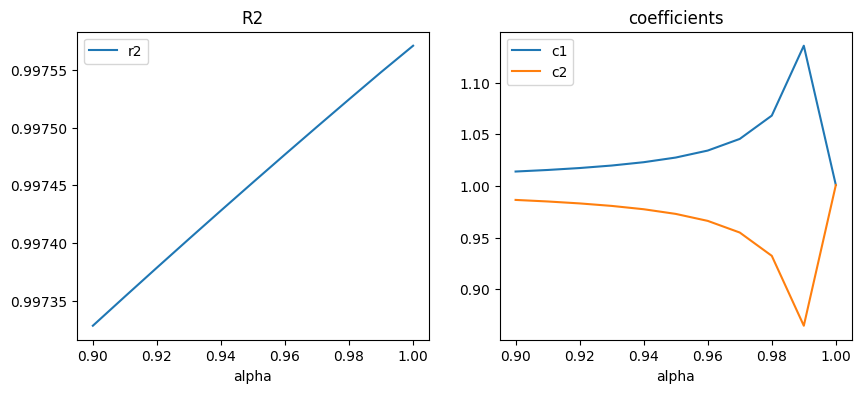

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df[["r2"]].plot(ax=ax[0])
df[["c1", "c2"]].plot(ax=ax[1])
ax[0].set_title("R2")
ax[1].set_title("coefficients");

Le $r^2$ augmente quand la corrélation augmente mais les coefficients sont moins fiables. Les résultats devraient être sensiblement identiques en théorie mais en pratique, plus le déterminant devient proche de zéro, plus l'ordinateur est limité par sa précision numérique. Pour en savoir plus, vous pouvez lire un examen écrit que j'ai rédigé, en python bien sûr : [Examen Programmation ENSAE première année
2006](https://sdpython.github.io/doc/teachpyx/dev/_downloads/f9f86ad8c2bcfcba777d6ed8caafb5f6/td_note_2006.pdf). Cette précision est aux alentours de $10^{-15}$ ce qui correspond à la précision numérique des [double](https://en.wikipedia.org/wiki/Double-precision_floating-point_format).

In [25]:
alphas = [1 - 10 ** (-i) for i in range(10, 18)]
res = []
for a in alphas:
    X = X_.copy()
    X[:, 1] = a * X[:, 0] + (1 - a) * X[:, 1]
    Y = X[:, 0] + X[:, 1] + X[:, 2]
    model = OLS(Y, X[:, :2])
    results = model.fit()
    res.append(
        dict(
            alpha_1=a - 1,
            r2=results.rsquared,
            rank=model.rank,
            c1=results.params[0],
            c2=results.params[1],
        )
    )

import pandas

df = pandas.DataFrame(res)
df = df.set_index("alpha_1")
df

,r2,rank,c1,c2
alpha_1,,,,
-1.000000e-10,0.806651,2,1.355493e+08,-1.355493e+08
-1.000000e-11,0.806651,2,1.355632e+09,-1.355632e+09
-9.999779e-13,0.806651,2,1.355997e+10,-1.355997e+10
-1.000311e-13,0.806651,2,1.357117e+11,-1.357117e+11
-9.992007e-15,0.806648,2,1.410632e+12,-1.410632e+12
-9.992007e-16,0.806616,2,1.008605e+00,1.008605e+00
-1.110223e-16,0.806616,1,1.008605e+00,1.008605e+00
0.000000e+00,0.806616,1,1.008605e+00,1.008605e+00


On fait un dernier test avec [scikit-learn](http://scikit-learn.org/stable/) pour vérifier que l'algorithme de résolution donne des résultats similaires pour un cas où le déterminant est quasi-nul.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

alphas = [0.9 + i * 0.01 for i in range(11)]
res = []
for a in alphas:
    X = X_.copy()
    X[:, 1] = a * X[:, 0] + (1 - a) * X[:, 1]
    Y = X[:, 0] + X[:, 1] + X[:, 2]
    model = LinearRegression()
    model.fit(X[:, :2], Y)
    r2 = r2_score(Y, model.predict(X[:, :2]))
    res.append(dict(alpha=a, c1=model.coef_[0], c2=model.coef_[1], r2=r2))

import pandas

df = pandas.DataFrame(res)
df = df.set_index("alpha")
df

,c1,c2,r2
alpha,,,
0.90,1.140599,0.863675,0.791250
0.91,1.155746,0.848528,0.792821
0.92,1.174680,0.829593,0.794384
0.93,1.199024,0.805250,0.795940
0.94,1.231482,0.772791,0.797489
0.95,1.276924,0.727350,0.799029
0.96,1.345087,0.659187,0.800562
0.97,1.458691,0.545583,0.802087
0.98,1.685900,0.318374,0.803603


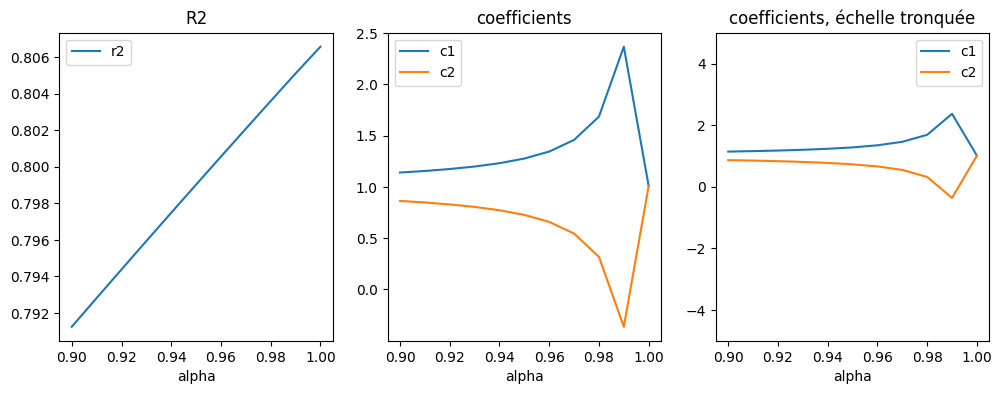

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
df[["c1", "c2"]].plot(ax=ax[1])
df[["c1", "c2"]].plot(ax=ax[2])
df[["r2"]].plot(ax=ax[0])
ax[0].set_title("R2")
ax[1].set_title("coefficients")
ax[2].set_ylim([-5, 5])
ax[2].set_title("coefficients, échelle tronquée");

Le second graphe est trompeur mais il ne faut pas oublier de regarder l'échelle de l'axe des ordonnées.

## Indicatrices

$X_1$ est une variable aléatoire gaussienne. On teste maintenant un modèle $Y = X'_1 + X'_2 + \epsilon$ avec $X'_1 = X_1 \mathbb{1}_{X_1 < 0}$ et $X'_2 = X_1 \mathbb{1}_{X_1 \geqslant 0}$.

In [28]:
X = npr.normal(size=(1000, 3))
X[:, 1] = X[:, 0]
X[X[:, 0] >= 0, 0] = 0
X[X[:, 1] < 0, 1] = 0
Y = X[:, 0] + X[:, 1] + X[:, 2]
corrcoef(X.T)

array([[ 1.        ,  0.48561838,  0.0042644 ],
       [ 0.48561838,  1.        , -0.01058737],
       [ 0.0042644 , -0.01058737,  1.        ]])

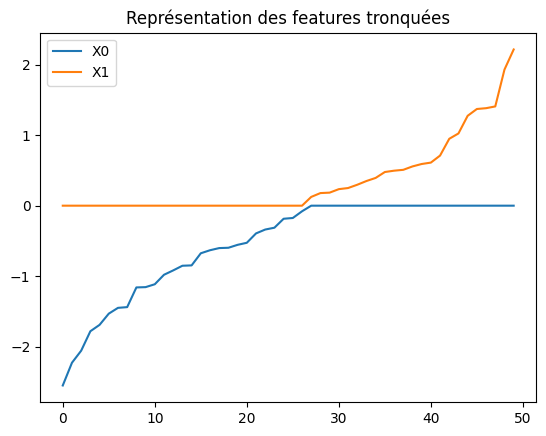

In [29]:
from pandas import DataFrame

names = ["X%d" % i for i in range(X.shape[1] - 1)]
ax = (
    DataFrame(X[:50, :2], columns=names)
    .sort_values(names)
    .reset_index(drop=True)
    .plot()
)
ax.set_title("Représentation des features tronquées");

In [30]:
model = OLS(Y, X[:, :3])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.581e+33
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                        0.00
Time:                        11:29:06   Log-Likelihood:                          33532.
No. Observations:                1000   AIC:                                 -6.706e+04
Df Residuals:                     997   BIC:                                 -6.704e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   2.98e-17   3.35e+16      0.000       1.000       1.000
x2             1.0000   2.73e-17   3.66e+16      0.000       1.000       1.000
x3             1.0000   2.09e-17   4.79e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       20.214   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.796
Skew:                           0.179   Prob(JB):                     2.05e-07
Kurtosis:                       3.781   Cond. No.                         1.43
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On découpe en trois.

In [31]:
import numpy

X = npr.normal(size=(1000, 4))
for i in range(3):
    X[:, i] = X_[:, 0]
X[:, 3] = X_[:, 2]
X[X_[:, 0] > -1, 0] = 0
X[(X_[:, 0] < -1) | (X_[:, 0] > 1), 1] = 0
X[X_[:, 0] < 1, 2] = 0
Y = X[:, 0] + X[:, 1] + X[:, 2] + X[:, 3]
corrcoef(X.T)

array([[ 1.        , -0.0221138 ,  0.15312241, -0.01158589],
       [-0.0221138 ,  1.        ,  0.02182757,  0.03734989],
       [ 0.15312241,  0.02182757,  1.        ,  0.01263351],
       [-0.01158589,  0.03734989,  0.01263351,  1.        ]])

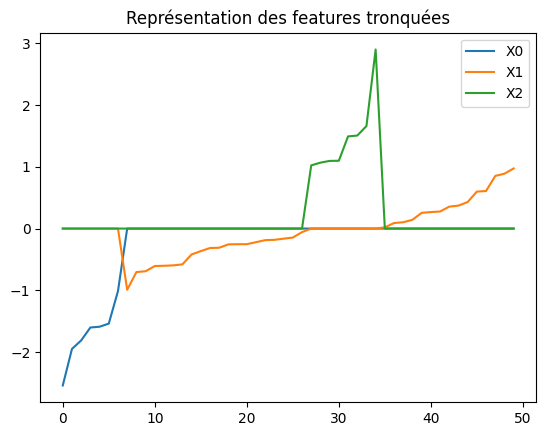

In [32]:
from pandas import DataFrame

names = ["X%d" % i for i in range(X.shape[1] - 1)]
ax = (
    DataFrame(X[:50, :3], columns=names)
    .sort_values(names)
    .reset_index(drop=True)
    .plot()
)
ax.set_title("Représentation des features tronquées");

In [33]:
model = OLS(Y, X[:, :4])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.030e+31
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                        0.00
Time:                        11:29:06   Log-Likelihood:                          31722.
No. Observations:                1000   AIC:                                 -6.344e+04
Df Residuals:                     996   BIC:                                 -6.342e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   2.07e-16   4.84e+15      0.000       1.000       1.000
x2             1.0000   2.87e-16   3.49e+15      0.000       1.000       1.000
x3             1.0000   2.01e-16   4.97e+15      0.000       1.000       1.000
x4             1.0000    1.3e-16   7.66e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      457.510   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1715.476
Skew:                           2.280   Prob(JB):                         0.00
Kurtosis:                       7.514   Cond. No.                         2.20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Régression linéaire par morceaux

On se place dans un cas particulier où le problème est linéaire par morceaux :

$$Y = -2 X_1 \mathbb{1}_{X_1 + \epsilon_1 <0} + 4 X_1 \mathbb{1}_{X + \epsilon_1 > 0} + \epsilon_2$$

La régression donne de très mauvais résultat sur ce type de problèmes mais on cherche une façon systématique de découper le problème en segments linéaires.

In [34]:
X = npr.normal(size=(1000, 4))
alpha = [4, -2]
t = (X[:, 0] + X[:, 3] * 0.5) > 0
switch = numpy.zeros(X.shape[0])
switch[t] = 1
Y = alpha[0] * X[:, 0] * t + alpha[1] * X[:, 0] * (1 - t) + X[:, 2]

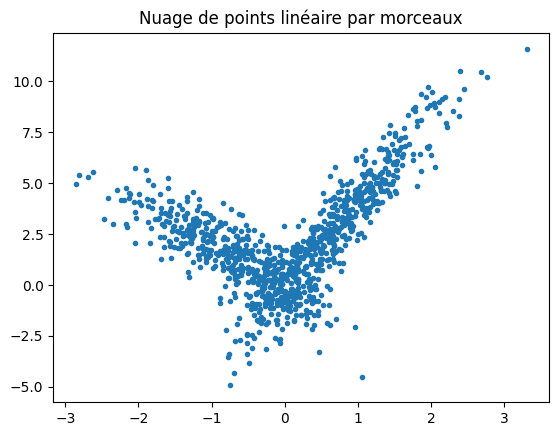

In [35]:
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], Y, ".")
ax.set_title("Nuage de points linéaire par morceaux");

In [36]:
model = OLS(Y, X[:, :1])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.107
Model:                            OLS   Adj. R-squared (uncentered):              0.106
Method:                 Least Squares   F-statistic:                              119.3
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                    2.56e-26
Time:                        11:29:06   Log-Likelihood:                         -2555.7
No. Observations:                1000   AIC:                                      5113.
Df Residuals:                     999   BIC:                                      5118.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0940      0.100     10.924      0.000       0.897       1.290
==============================================================================
Omnibus:                        3.084   Durbin-Watson:                   1.111
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.960
Skew:                           0.088   Prob(JB):                        0.228
Kurtosis:                       2.801   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
yp = results.predict(X[:, :1])

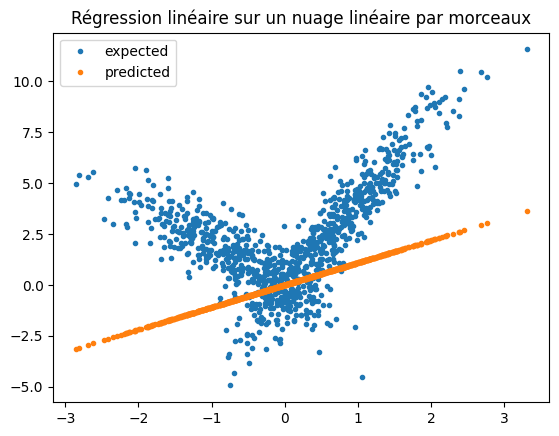

In [38]:
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], Y, ".", label="expected")
ax.plot(X[:, 0], yp, ".", label="predicted")
ax.legend()
ax.set_title("Régression linéaire sur un nuage linéaire par morceaux");

Passons à un arbre de décision qui n'est pas le meilleur modèle mais on va détourner ses résultats pour revenir à un problème de régression par morceaux.

In [39]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(min_samples_leaf=10, max_depth=3)
model.fit(X[:, :1], Y)
yp = model.predict(X[:, :1])

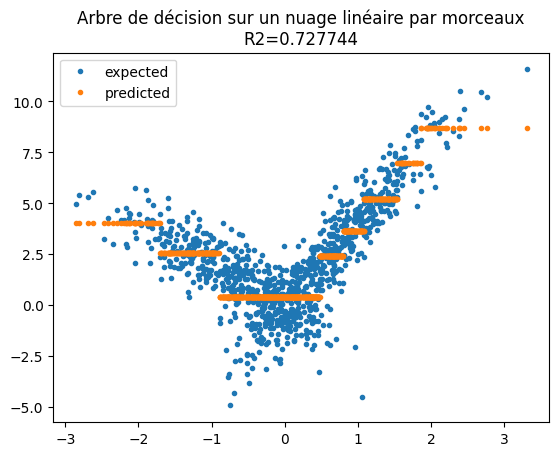

In [40]:
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], Y, ".", label="expected")
ax.plot(X[:, 0], yp, ".", label="predicted")
ax.legend()
r2 = r2_score(Y, model.predict(X[:, :1]))
ax.set_title("Arbre de décision sur un nuage linéaire par morceaux\nR2=%f" % r2);

In [41]:
import graphviz
from sklearn.tree import export_graphviz

dot = export_graphviz(model)

src = graphviz.Source(dot)
src.render("tree_dot.gv")

'tree_dot.gv.pdf'

On extrait tous les seuils de l'arbre et on ajoute les milieux de segments.

In [42]:
th = list(sorted(set(model.tree_.threshold)))
th += [(th[i] + th[i - 1]) / 2 for i in range(1, len(th))]
th = list(sorted(th))
th

[np.float64(-2.0),
 np.float64(-1.85539710521698),
 np.float64(-1.71079421043396),
 np.float64(-1.3022041469812393),
 np.float64(-0.8936140835285187),
 np.float64(-0.2086283266544342),
 np.float64(0.47635743021965027),
 np.float64(0.6395495533943176),
 np.float64(0.802741676568985),
 np.float64(0.942541167140007),
 np.float64(1.082340657711029),
 np.float64(1.310522198677063),
 np.float64(1.538703739643097),
 np.float64(1.6980005204677582),
 np.float64(1.8572973012924194)]

On fait une régression sur les variables $W_{i>0} = X_1 \mathbb{1}_{X_1 > t_i}$, $W_0 = X_1$ où les $(t_i)$ sont les seuils.

In [43]:
W = numpy.zeros((X.shape[0], len(th) + 1))
x = X[:, 0]
W[:, 0] = x
for i in range(len(th)):
    W[x > th[i], i + 1] = x[x > th[i]]

In [44]:
model = OLS(Y, W)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                              370.4
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                        0.00
Time:                        11:29:07   Log-Likelihood:                         -1637.5
No. Observations:                1000   AIC:                                      3307.
Df Residuals:                     984   BIC:                                      3385.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.8183      0.119    -15.303      0.000      -2.051      -1.585
x2            -0.4155      0.260     -1.600      0.110      -0.925       0.094
x3             0.2157      0.320      0.673      0.501      -0.413       0.845
x4             0.1368      0.247      0.553      0.581      -0.349       0.622
x5            -0.2634      0.166     -1.589      0.112      -0.589       0.062
x6             1.0105      0.196      5.164      0.000       0.627       1.395
x7             3.3282      0.356      9.357      0.000       2.630       4.026
x8             1.3866      0.454      3.051      0.002       0.495       2.278
x9             0.3655      0.403      0.907      0.365      -0.425       1.156
x10            0.1177      0.334      0.353      0.724      -0.537       0.773
x11           -0.3147      0.307     -1.023      0.306      -0.918       0.289
x12            0.2972      0.255      1.166      0.244      -0.203       0.797
x13           -0.0456      0.197     -0.231      0.817      -0.433       0.342
x14            0.2807      0.252      1.112      0.266      -0.215       0.776
x15           -0.3102      0.303     -1.024      0.306      -0.904       0.284
x16           -0.0231      0.237     -0.097      0.923      -0.489       0.443
==============================================================================
Omnibus:                      207.506   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              673.510
Skew:                          -0.999   Prob(JB):                    5.61e-147
Kurtosis:                       6.489   Cond. No.                         37.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dessinons les résultats de la prédictions.

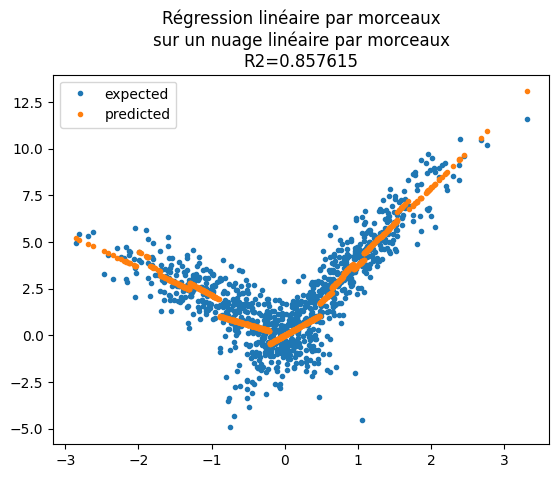

In [45]:
yp = results.predict(W)
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], Y, ".", label="expected")
ax.plot(X[:, 0], yp, ".", label="predicted")
ax.legend()
ax.set_title(
    "Régression linéaire par morceaux\nsur un nuage linéaire par morceaux\nR2=%f"
    % results.rsquared
);

Le modèle nous suggère de ne garder que quelques seuils. En s'appuyant sur les p-values :

In [46]:
keep = numpy.arange(len(results.pvalues))[results.pvalues < 0.05]
keep

array([0, 5, 6, 7])

In [47]:
W2 = W[:, keep]

In [48]:
model = OLS(Y, W2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.856
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                              1481.
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                        0.00
Time:                        11:29:08   Log-Likelihood:                         -1642.9
No. Observations:                1000   AIC:                                      3294.
Df Residuals:                     996   BIC:                                      3314.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.9657      0.062    -31.604      0.000      -2.088      -1.844
x2             0.8316      0.163      5.106      0.000       0.512       1.151
x3             3.3282      0.355      9.363      0.000       2.631       4.026
x4             1.7842      0.327      5.455      0.000       1.142       2.426
==============================================================================
Omnibus:                      225.520   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              775.424
Skew:                          -1.066   Prob(JB):                    4.16e-169
Kurtosis:                       6.750   Cond. No.                         17.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

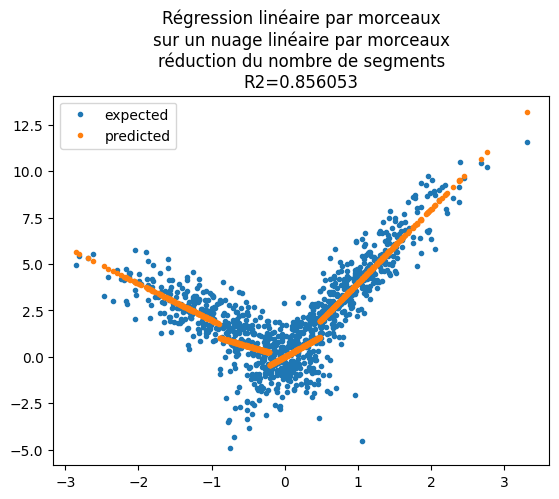

In [49]:
yp = results.predict(W2)
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], Y, ".", label="expected")
ax.plot(X[:, 0], yp, ".", label="predicted")
ax.legend()
ax.set_title(
    "Régression linéaire par morceaux\nsur un nuage linéaire par morceaux\n"
    + "réduction du nombre de segments\nR2=%f" % results.rsquared
);

Le coefficient $R^2$ est quasiment identique pour un nombre de segments moindre. Je me suis amusé à rendre ce code plus générique pour comparer la première étape, le découpage en morceaux, via deux modèles, un arbre de décision et le nouvel objet [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html) qui segmente une variable sans tenir compte de la cible. La régression n'est plus nécessaire linéaire : [Piecewise linear regression](https://sdpython.github.io/doc/mlinsights/dev/auto_examples/plot_piecewise_linear_regression.html). Je me suis également amusé à faire de même pour une classification par morceaux [PiecewiseClassifier](https://sdpython.github.io/doc/mlinsights/dev/api/mlmodel.html#piecewiseclassifier). Celle-ci pose quelques soucis pratiques car toutes les classes ne sont pas forcément représentées dans chaque compartiment...